### Implement a code to solve the full Hamiltonian with adaptive step size

The system is of the form: 
$$
\begin{align}
dq&=pdt \\
dp&= F(q) dt - \gamma p dt + \sqrt{2 \frac{\gamma}{\beta}} dW
\end{align}
$$
with $F(q)= q^2/2$.

We have using $\frac{dt}{ds} = g(x)$ that the system below has the same invariant distribution: 
$$
\begin{align}
dq&=g(q)pdt \\
dp&= g(q) F(q) dt - \gamma g(q) p dt + \sqrt{2 \frac{\gamma}{\beta} g(q)} dW
\end{align}
$$
with $F(q)= q^2/2$.

With the method BAOAB, we have: 
1. Step A
$$
dq=pdt\\
\dot{p}=0
$$
is generated as: 
$$
q_{n+1}=q_n+p_n h\\
$$

2. Step B 
$$
dp=g(q) F(q) ds\\
\dot{q}=0
$$
is generated as: 
$$
p_{n+1}=p_n+g(q_n) F(q_n) h\\
$$

3. Step O
$$
dp=-g(q) \gamma p ds + \sqrt{2 \gamma \beta^-1 g(q)} dW(s)\\
\dot{q}=0
$$
is generated as: 
$$
p_{n+1}=\exp(-\gamma g(q_n) h) p_n+ \sqrt{\frac{1-\exp(2 \gamma g(q_n)h)}{\beta}} \mathcal{N}(0,1)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integrate
from numba import jit,njit,vectorize, float64, int32
import numba as nb
import time as time
## ---------------- Mathplotlib settings ----------------
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%run "/home/s2133976/OneDrive/ExtendedProject/codingUsingNumba/WeakSDEapproximation/numba code/fullhamiltonian.py"

### Find an adaptive step size that works with the problem 

This is not so easy to do, therefore we would like to establish a step size that we control very well. Say we would like a step size with values between $\Delta t_{min} =0.001$ and $\Delta t_{max}=0.2$, with a growth to the step size we like control by the parameter $R$. 

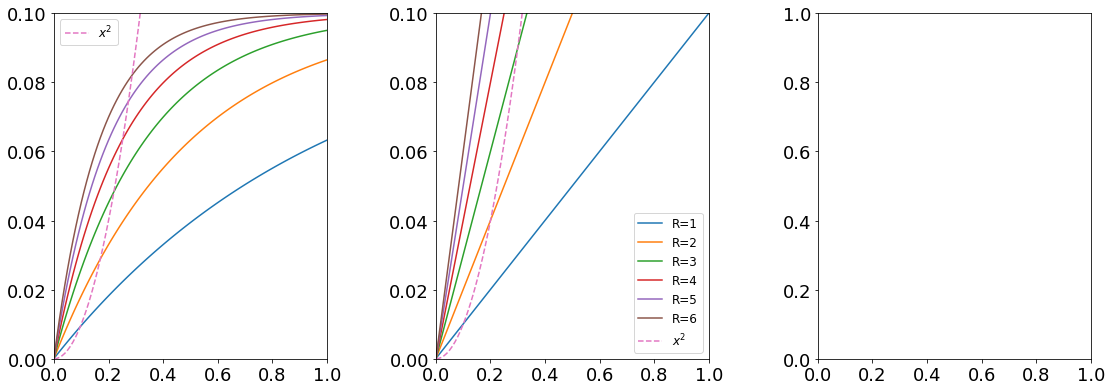

In [6]:
def var_stepsize1(x,dtmin, dtmax,R):
    return (dtmax-dtmin)*(np.abs(x))*R+dtmin

def var_stepsize2(x,dtmin, dtmax, R):
    return (dtmax-dtmin)*(1-np.exp(-np.abs(x)*R))+dtmin

def var_stepsize3(x,dtmin, dtmax, R):
    return (dtmax-dtmin)*(1-np.exp(-np.abs(x)*R))+dtmin

x=np.arange(0,30,0.01)

fig, (ax1,ax2,ax3)= plt.subplots(1, 3,figsize=(18,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)

Rrange=[1,2,3,4,5,6]
for ri in Rrange:
    ax1.plot(x,var_stepsize2(x,0.0001, 0.1, ri))
    ax2.plot(x,var_stepsize1(x,0.0001, 0.1,ri),label="R="+str(ri))
ax1.plot(x,x**2,"--",label="$x^2$")
ax2.plot(x,x**2,"--",label="$x^2$")
ax2.set_ylim(0,0.1)
ax2.set_xlim(0,1)

ax1.set_ylim(0,0.1)
ax1.set_xlim(0,1)

ax1.legend()
ax2.legend()

In [10]:
%run "/home/s2133976/OneDrive/ExtendedProject/codingUsingNumba/WeakSDEapproximation/numba code/fullhamiltonian_adaptive.py"


<Figure size 432x288 with 0 Axes>

In [11]:
T=10
h = 0.1
gamma = 1
beta=10000
# compile
N=1
%time qp=method_baoab_ada(T,gamma,beta,h,N)
# run for 1 no compiler 
N=1
%time qp=method_baoab_ada(T,gamma,beta,h,N)

CPU times: user 1.4 s, sys: 0 ns, total: 1.4 s
Wall time: 1.14 s
CPU times: user 24.6 ms, sys: 0 ns, total: 24.6 ms
Wall time: 504 µs


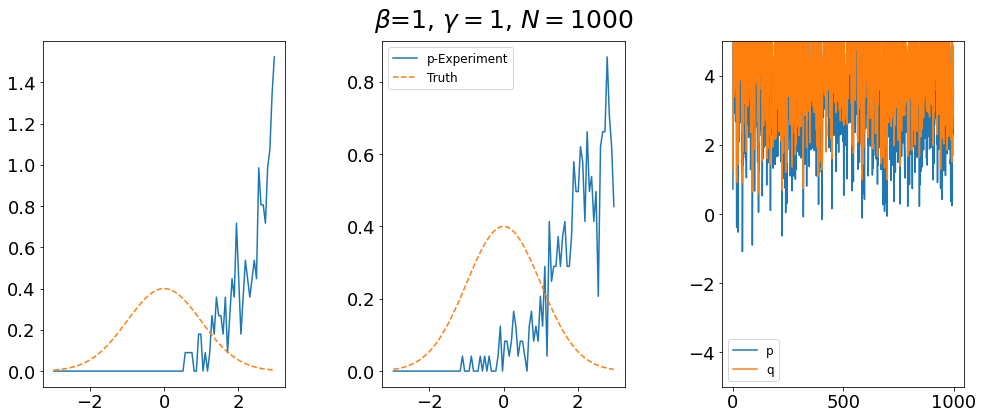

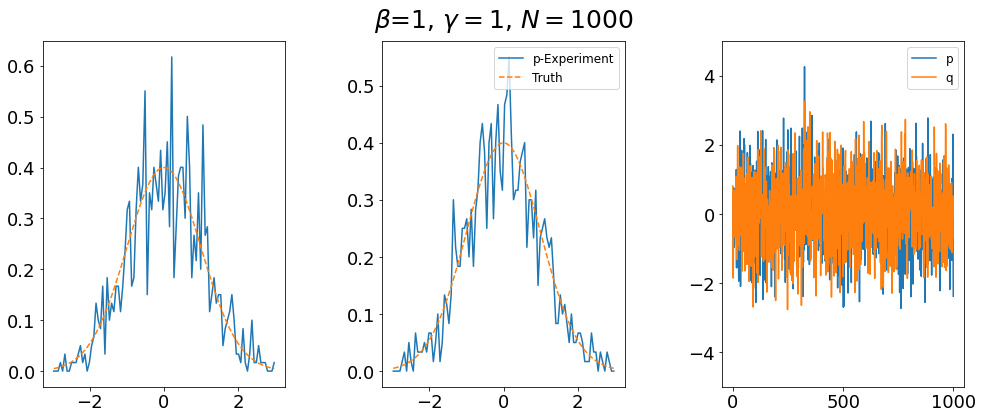

In [14]:
T=10
gamma = 1
beta=1
N=10**3
h = 0.0001
qp1ada=method_baoab_ada(T,gamma,beta,h,N)

h = 0.1
qp1=method_baoab(T,gamma,beta,h,N)

plot_qp(qp1ada,beta,gamma)
plot_qp(qp1,beta,gamma)